In [132]:
from sklearn import datasets
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.spatial.distance import jaccard
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
# Select your learner
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neural_network import MLPClassifier as NN
from sklearn.svm import SVC 
import os
import re
import sys,traceback

%pylab

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [133]:
# Here we import a csv data set
# Make sure that the data and your jupyter code are inside the same folder
# does any one knows how to upload data from colab
data = pd.read_csv('/home/nyirahakizimana/Downloads/Attrition.csv') 


In [134]:
df =pd.DataFrame(data)
#df1=df.drop(data.columns[[3,4,6]], axis=1)
df.head() # We want to have a look at the first 5 data point

,Names,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,MaritalStatus,Monthly Salary
0,HITIMANA JONAS,41,Yes,1,2,1,2,Female,Single,5993
1,NYIRABAGENZI CHRISTINE,49,No,8,1,2,3,Male,Married,5130
2,SEBAGABO SAMUEL,37,Yes,2,2,4,4,Male,Single,2090
3,MUKANKUNSI ELEDA,33,No,3,4,5,4,Female,Married,2909
4,IRABONA J DEDIEU,27,No,2,1,7,1,Male,Married,3468


In [135]:
# We check for mising values. The result 0 shows that there is not any missing values, 
# otherwise, the output will be greater than 0
df.isnull().sum().sum()

0

In [136]:
df.shape

(1470, 10)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
Names                      1470 non-null object
Age                        1470 non-null int64
Attrition                  1470 non-null object
DistanceFromHome           1470 non-null int64
Education                  1470 non-null int64
EmployeeNumber             1470 non-null int64
EnvironmentSatisfaction    1470 non-null int64
Gender                     1470 non-null object
MaritalStatus              1470 non-null object
Monthly Salary             1470 non-null int64
dtypes: int64(6), object(4)
memory usage: 114.9+ KB


In [138]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Monthly Salary
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,6502.931293
std,9.135373,8.106864,1.024165,602.024335,1.093082,4707.956783
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2911.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,4919.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,8379.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,19999.000000


In [139]:
df.tail()

,Names,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,MaritalStatus,Monthly Salary
1465,MUNDANIKURE CECILE,36,No,23,2,2061,3,Male,Married,2571
1466,NTAWUHIGIMANA PATRICE,39,No,6,1,2062,4,Male,Married,9991
1467,MUKANTWALI EMERTHA,27,No,4,3,2064,2,Male,Married,6142
1468,NYIRAHABIMANA BETTY,49,No,2,3,2065,4,Male,Married,5390
1469,MUSABYIMANA SUZANNE,34,No,8,3,2068,2,Male,Married,4404


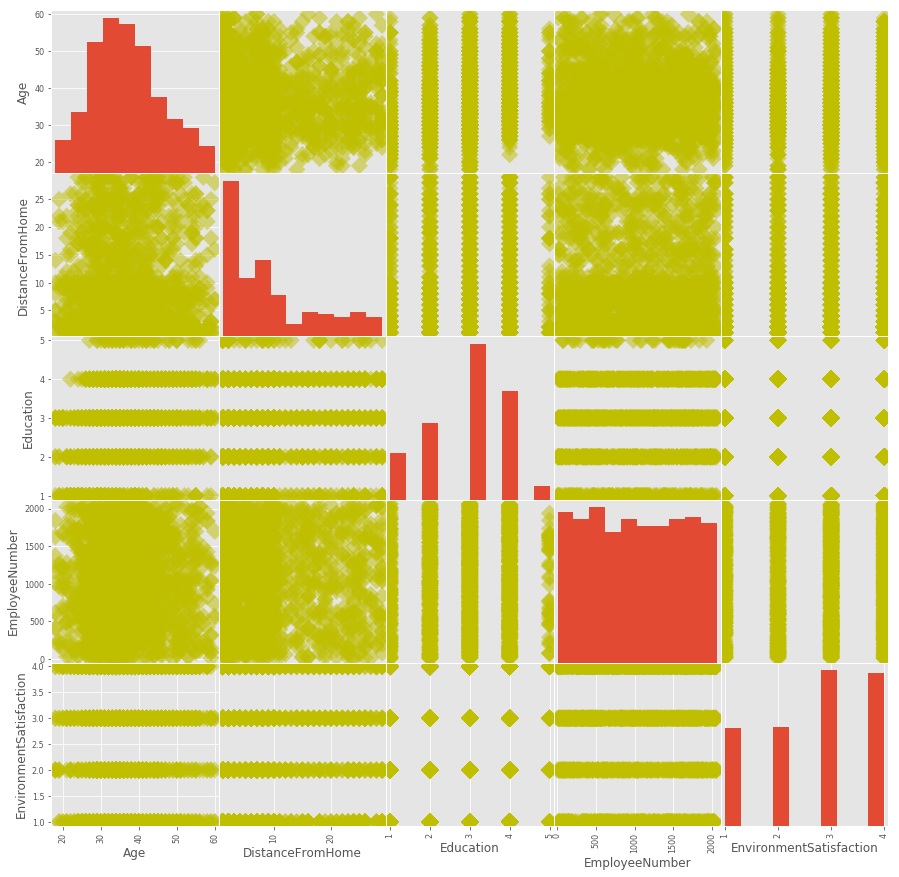

In [146]:
# Show the mutual scatter plot of the first 10 attributes. When the scatter plot involves a 
# an attibute against itself, its histogram is display instead of the scatter plot.

pd.plotting.scatter_matrix(df.iloc[:,0:9], c='y', figsize=(15,15), s=150, marker='D')
plt.show()

In [147]:
df.corr()


,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Monthly Salary
Age,1.000000,-0.001686,0.208034,-0.010145,0.010146,0.497855
DistanceFromHome,-0.001686,1.000000,0.021042,0.032916,-0.016075,-0.017014
Education,0.208034,0.021042,1.000000,0.042070,-0.027128,0.094961
EmployeeNumber,-0.010145,0.032916,0.042070,1.000000,0.017621,-0.014829
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,0.017621,1.000000,-0.006259
Monthly Salary,0.497855,-0.017014,0.094961,-0.014829,-0.006259,1.000000


# Sample data useful in this work

In [149]:
Sample =df.drop(df.columns[[4,5,7,8]], axis=1)#feature selection
Sample.head()

,Names,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Monthly Salary
0,HITIMANA JONAS,41,Yes,1,2,5993
1,NYIRABAGENZI CHRISTINE,49,No,8,3,5130
2,SEBAGABO SAMUEL,37,Yes,2,4,2090
3,MUKANKUNSI ELEDA,33,No,3,4,2909
4,IRABONA J DEDIEU,27,No,2,1,3468


# Data Visualization

In [150]:
sample1 =Sample .drop(df.columns[[0]], axis=1)# remove column of names
sample1.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Monthly Salary
0,41,Yes,1,2,5993
1,49,No,8,3,5130
2,37,Yes,2,4,2090
3,33,No,3,4,2909
4,27,No,2,1,3468


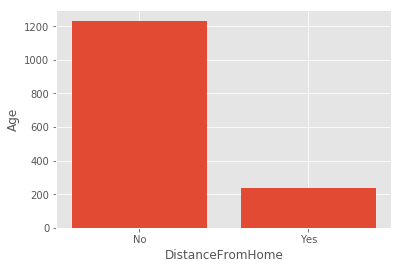

In [151]:
left_count=sample1.groupby('Attrition').count()
plt.bar(left_count.index.values, left_count['EnvironmentSatisfaction'])
plt.xlabel('DistanceFromHome')
plt.ylabel('Age')
plt.show()

In [152]:
Sample.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

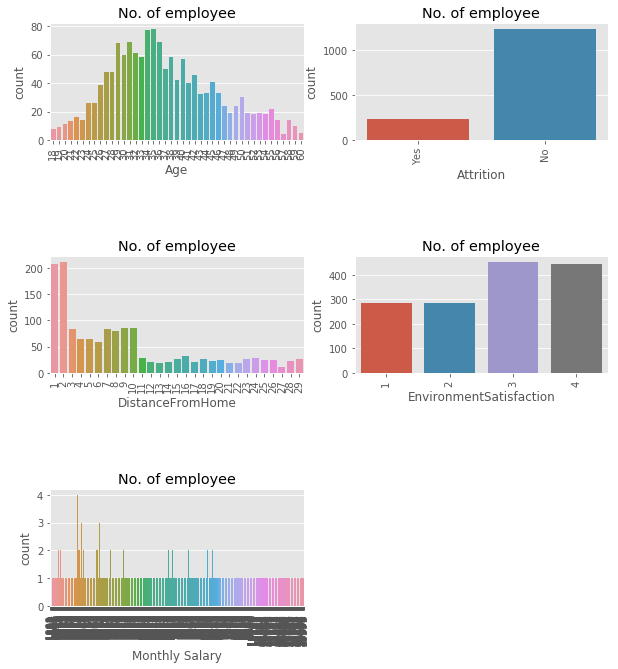

In [153]:
features=['Age','Attrition','DistanceFromHome','EnvironmentSatisfaction', 'Monthly Salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sn.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

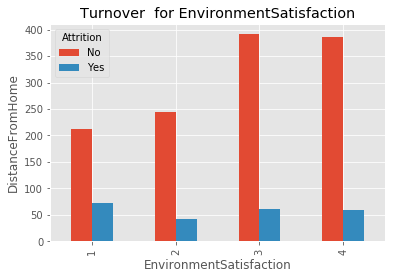

In [155]:
pd.crosstab(sample1.EnvironmentSatisfaction,sample1.Attrition).plot(kind='bar')
plt.title('Turnover  for EnvironmentSatisfaction')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('DistanceFromHome')
plt.savefig('department_bar_chart')

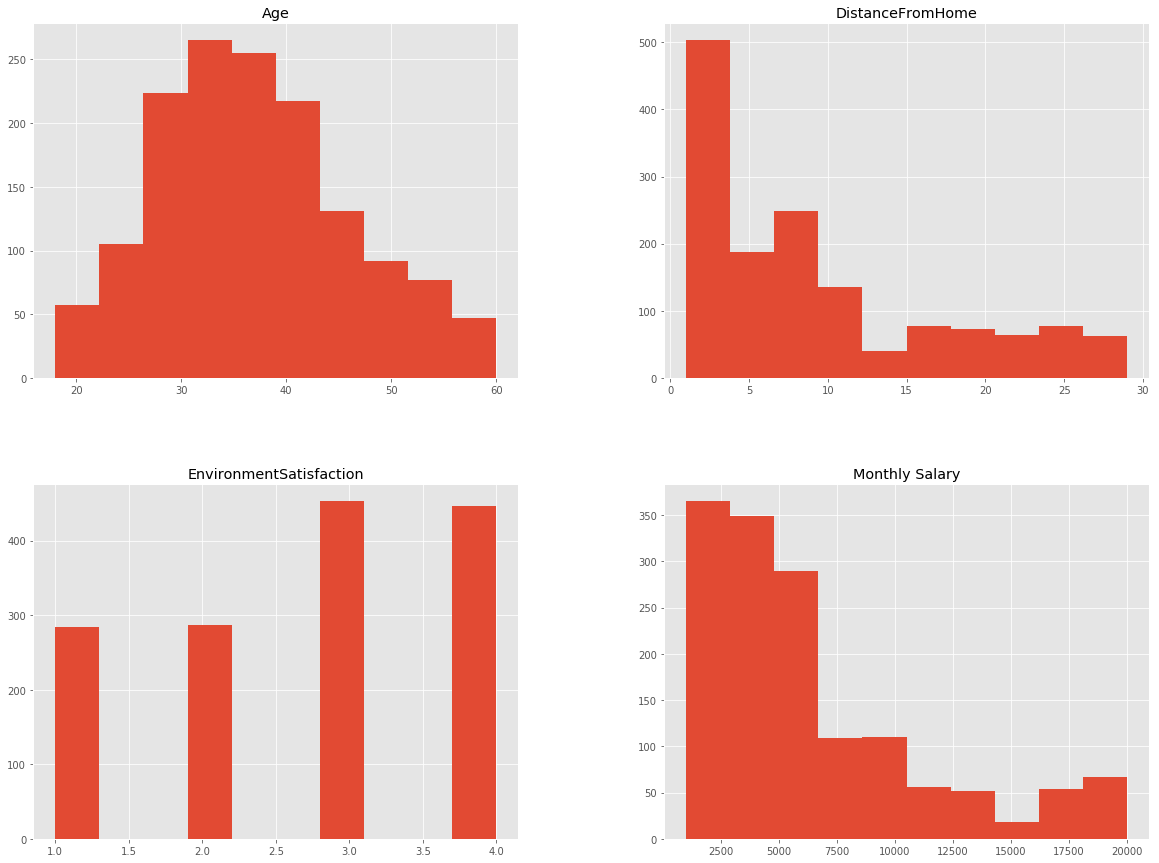

In [19]:
num_bins = 10

sample1.hist(bins=num_bins, figsize=(20,15))
plt.savefig("sample1_histogram_plots")
plt.show()

# average employee who leave organization

In [156]:
left = sample1.groupby('Attrition')
left.mean()

,Age,DistanceFromHome,EnvironmentSatisfaction,Monthly Salary
Attrition,,,,
No,37.561233,8.915653,2.771290,6832.739659
Yes,33.607595,10.632911,2.464135,4787.092827


In [157]:


left = sample1.groupby('EnvironmentSatisfaction')
left.mean()


,Age,DistanceFromHome,Monthly Salary
EnvironmentSatisfaction,,,
1,37.109155,9.172535,6717.080986
2,36.508711,9.599303,6283.728223
3,36.772627,9.176600,6482.366446
4,37.226457,8.959641,6528.511211


In [158]:
left = sample1.groupby('DistanceFromHome')
left.mean()


,Age,EnvironmentSatisfaction,Monthly Salary
DistanceFromHome,,,
1,37.052885,2.697115,6513.240385
2,38.497630,2.781991,6964.004739
3,35.916667,2.702381,6589.226190
4,36.781250,2.812500,7060.890625
5,34.615385,2.661538,6442.415385
6,37.559322,2.677966,6231.440678
7,37.845238,2.678571,6839.035714
8,36.662500,2.637500,6271.987500
9,36.211765,2.611765,5521.376471


In [159]:
left = sample1.groupby('Age')
left.mean()

,DistanceFromHome,EnvironmentSatisfaction,Monthly Salary
Age,,,
18,6.125000,2.750000,1518.375000
19,10.555556,2.444444,2075.000000
20,7.090909,3.181818,2539.363636
21,9.076923,2.692308,2491.461538
22,8.437500,2.812500,2950.000000
23,9.142857,2.857143,2515.357143
24,11.884615,2.500000,3243.923077
25,8.769231,2.538462,4144.769231
26,10.230769,2.384615,3531.487179


# Numerical variables similarity

In [160]:

numerical_dta = sample1.drop(sample1.columns[[1,3]], axis=1) # drop removes the columns of all categorical V out of the dataset 'data'
#y = data.loc[:,'Attrition','Gender','MaritalStatus'] # '

numerical_dta.head()

,Age,DistanceFromHome,Monthly Salary
0,41,1,5993
1,49,8,5130
2,37,2,2090
3,33,3,2909
4,27,2,3468


In [161]:
number_x = numerical_dta.Age
number_y = numerical_dta.DistanceFromHome

In [162]:
s =pearsonr(number_y,number_x)
s

(-0.0016861201480870276, 0.9484989537019234)

In [163]:
k=euclidean_distances(numerical_dta)
W =1/(k+1)
W

array([[1.00000000e+00, 1.15731972e-03, 2.56147398e-04, ...,
        6.63630166e-03, 1.65548142e-03, 6.28918620e-04],
       [1.15731972e-03, 1.00000000e+00, 3.28835996e-04, ...,
        9.86926183e-04, 3.83040174e-03, 1.37522272e-03],
       [2.56147398e-04, 3.28835996e-04, 1.00000000e+00, ...,
        2.46730035e-04, 3.02936501e-04, 4.31963628e-04],
       ...,
       [6.63630166e-03, 9.86926183e-04, 2.46730035e-04, ...,
        1.00000000e+00, 1.32744937e-03, 5.75036945e-04],
       [1.65548142e-03, 3.83040174e-03, 3.02936501e-04, ...,
        1.32744937e-03, 1.00000000e+00, 1.01303539e-03],
       [6.28918620e-04, 1.37522272e-03, 4.31963628e-04, ...,
        5.75036945e-04, 1.01303539e-03, 1.00000000e+00]])

# Categorical variables similarity

In [164]:
categorica = sample1.drop(sample1.columns[[0,2,4]], axis=1) 
categorica.head() 

,Attrition,EnvironmentSatisfaction
0,Yes,2
1,No,3
2,Yes,4
3,No,4
4,No,1


In [165]:
newcategorica = sample1.drop(sample1.columns[[0,2,4]], axis=1) 
newcategorica ['Attrition'] =df['Attrition'].astype('category').cat.codes
#newcategorica ['EnvironmentSatisfaction'] =df['EnvironmentSatisfaction'].astype('category').cat.codes
newcategorica.head()

,Attrition,EnvironmentSatisfaction
0,1,2
1,0,3
2,1,4
3,0,4
4,0,1


In [166]:
m=newcategorica['Attrition']
n=newcategorica['EnvironmentSatisfaction']
corr = spearmanr(m,n)
corr

SpearmanrResult(correlation=-0.09648641952769646, pvalue=0.00021152006603183647)

In [167]:
S=cosine_similarity(newcategorica)
S

array([[1.        , 0.89442719, 0.97618706, ..., 0.89442719, 0.89442719,
        0.89442719],
       [0.89442719, 1.        , 0.9701425 , ..., 1.        , 1.        ,
        1.        ],
       [0.97618706, 0.9701425 , 1.        , ..., 0.9701425 , 0.9701425 ,
        0.9701425 ],
       ...,
       [0.89442719, 1.        , 0.9701425 , ..., 1.        , 1.        ,
        1.        ],
       [0.89442719, 1.        , 0.9701425 , ..., 1.        , 1.        ,
        1.        ],
       [0.89442719, 1.        , 0.9701425 , ..., 1.        , 1.        ,
        1.        ]])

In [168]:
sim_cat_between = cosine_similarity(np.transpose(newcategorica))

sim_cat_between


array([[1.        , 0.33734887],
       [0.33734887, 1.        ]])

#  Mixed variables changed from categorical value to numerical value

In [170]:
df2=df.drop(data.columns[[0,4,5,7,8]], axis=1)
df2['Attrition'] =df['Attrition'].astype('category').cat.codes
#df2['Gender'] =df['Gender'].astype('category').cat.codes
df2.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Monthly Salary
0,41,1,1,2,5993
1,49,0,8,3,5130
2,37,1,2,4,2090
3,33,0,3,4,2909
4,27,0,2,1,3468


# correlation between attributes and one target attributes as attrition

In [171]:
df2[df2.columns[0:]].corr()['Attrition'][:] #the correlation between the 'Attrition' and all the other features.

Age                       -0.159205
Attrition                  1.000000
DistanceFromHome           0.077924
EnvironmentSatisfaction   -0.103369
Monthly Salary            -0.159840
Name: Attrition, dtype: float64

# similarity for mixed variables

In [176]:
m = cosine_similarity(np.transpose(df2))
m

array([[1.        , 0.35477564, 0.7279099 , 0.90176868, 0.85648454],
       [0.35477564, 1.        , 0.34838803, 0.33734887, 0.23945102],
       [0.7279099 , 0.34838803, 1.        , 0.69215347, 0.60107414],
       [0.90176868, 0.33734887, 0.69215347, 1.        , 0.75040968],
       [0.85648454, 0.23945102, 0.60107414, 0.75040968, 1.        ]])

In [177]:
v = cosine_similarity(df2)
v

array([[1.        , 0.99999531, 0.99993942, ..., 0.99999688, 0.99999735,
        0.99999823],
       [0.99999531, 1.        , 0.99996561, ..., 0.99998626, 0.99999918,
        0.99999828],
       [0.99993942, 0.99996561, 1.        , ..., 0.99991006, 0.99996195,
        0.99994864],
       ...,
       [0.99999688, 0.99998626, 0.99991006, ..., 1.        , 0.99998885,
        0.99999379],
       [0.99999735, 0.99999918, 0.99996195, ..., 0.99998885, 1.        ,
        0.99999797],
       [0.99999823, 0.99999828, 0.99994864, ..., 0.99999379, 0.99999797,
        1.        ]])

In [178]:
df2.corr()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Monthly Salary
Age,1.000000,-0.159205,-0.001686,0.010146,0.497855
Attrition,-0.159205,1.000000,0.077924,-0.103369,-0.159840
DistanceFromHome,-0.001686,0.077924,1.000000,-0.016075,-0.017014
EnvironmentSatisfaction,0.010146,-0.103369,-0.016075,1.000000,-0.006259
Monthly Salary,0.497855,-0.159840,-0.017014,-0.006259,1.000000


In [179]:
from sklearn.metrics.pairwise import pairwise_distances 
jac = 1-pairwise_distances(newcategorica, metric = 'hamming')
jac

array([[1. , 0. , 0.5, ..., 0.5, 0. , 0.5],
       [0. , 1. , 0. , ..., 0.5, 0.5, 0.5],
       [0.5, 0. , 1. , ..., 0. , 0.5, 0. ],
       ...,
       [0.5, 0.5, 0. , ..., 1. , 0.5, 1. ],
       [0. , 0.5, 0.5, ..., 0.5, 1. , 0.5],
       [0.5, 0.5, 0. , ..., 1. , 0.5, 1. ]])

#  KNN mixed data classifier

In [181]:
KNeighborsClassifier(n_neighbors=20, weights='distance', algorithm='ball_tree', leaf_size=30, p=3, metric='minkowski', metric_params=None, n_jobs=2)
neigh = KNeighborsClassifier(n_neighbors=20)

In [191]:
#X=num_Drad.drop('Weight',axis=1)
#y =num_Drad.loc[:,'Weight']
X=df2.drop(['Attrition'],axis=1)
y= df2.loc[:,'Attrition']
# Choses 90% of the data for training, (X_train,y_train), and reserves 10% for test (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=20, stratify = y)
neigh.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = neigh.predict(X_train)
# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_train, y_train))# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_tr_pred =neigh.predict(X_test)
y_tr_pred
# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_tr_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_test, y_test))

Classification repport:
              precision    recall  f1-score   support

          0       0.86      0.98      0.92       863
          1       0.61      0.19      0.29       166

avg / total       0.82      0.85      0.81      1029

Accuracy score:
 0.8493683187560739
Classification repport:
              precision    recall  f1-score   support

          0       0.85      0.95      0.90       370
          1       0.38      0.15      0.22        71

avg / total       0.78      0.82      0.79       441

Accuracy score:
 0.8231292517006803


In [192]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(neigh, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.82033898 0.82711864 0.81972789 0.83276451 0.83276451]
Mean of the scores:  0.826542905702803 
 with standard deviation 0.005704053870814081

Metric used:  precision_macro
Cross validation scores: [0.58988095 0.58799534 0.58071043 0.63360024 0.64080901]
Mean of the scores:  0.6065991942111288 
 with standard deviation 0.025279236719658545

Metric used:  recall_macro
Cross validation scores: [0.53184042 0.51910425 0.53092428 0.53896385 0.54756962]
Mean of the scores:  0.5336804847934775 
 with standard deviation 0.009426252779225708


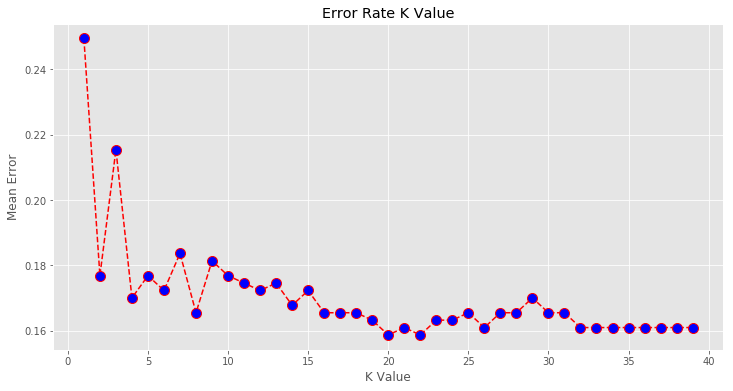

In [193]:
error1 = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error1.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


#  KNN Numerical data classifier

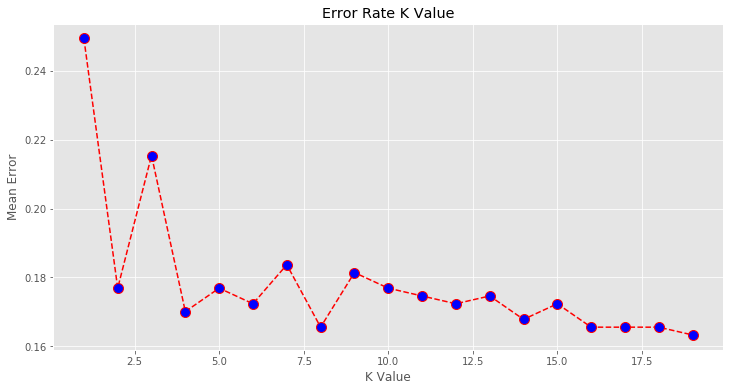

In [194]:
error1 = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error1.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


In [195]:
KNeighborsClassifier(n_neighbors=24, weights='distance', algorithm='ball_tree', leaf_size=30, p=3, metric='minkowski', metric_params=None, n_jobs=2)
neigh = KNeighborsClassifier(n_neighbors=5)

In [196]:

## Divides the dataset into X, variables, and y, target
X = numerical_dta.drop('DistanceFromHome', axis=1) # drop removes the column named 'R' out of the dataset 'data'
y = numerical_dta.loc[:,'DistanceFromHome'] # 'loc' is for 'location/localize'. Thus, we selected all the row of the column which is 
# localized by the name 'R'
#X = df2.drop('Gender', axis=1)
#y = df2.loc[:,'Gender']
## Choses 50% of the data for training, (X_train,y_train), and reserves 50% for test (X_test, y_test) 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.50, random_state=80, stratify = y)

## Trains the learner, Log, with the training dataset
neigh.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = neigh.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_train, y_train))

Classification repport:
              precision    recall  f1-score   support

          1       0.28      0.85      0.43       104
          2       0.30      0.59      0.40       106
          3       0.35      0.43      0.38        42
          4       0.23      0.16      0.19        32
          5       0.38      0.24      0.30        33
          6       0.25      0.10      0.15        29
          7       0.42      0.24      0.30        42
          8       0.35      0.17      0.23        40
          9       0.35      0.17      0.23        42
         10       0.47      0.21      0.29        43
         11       0.40      0.13      0.20        15
         12       0.00      0.00      0.00        10
         13       0.00      0.00      0.00        10
         14       0.50      0.10      0.17        10
         15       0.00      0.00      0.00        13
         16       0.57      0.25      0.35        16
         17       0.00      0.00      0.00        10
         18       0.

In [197]:
# Test the learner, Log, with the test dataset

## Prediction on the training dataset
y_te_pred = neigh.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_test, y_test))

Classification repport:
              precision    recall  f1-score   support

          1       0.13      0.34      0.19       104
          2       0.15      0.32      0.21       105
          3       0.08      0.12      0.10        42
          4       0.09      0.09      0.09        32
          5       0.00      0.00      0.00        32
          6       0.08      0.03      0.05        30
          7       0.03      0.02      0.03        42
          8       0.00      0.00      0.00        40
          9       0.00      0.00      0.00        43
         10       0.03      0.02      0.03        43
         11       0.00      0.00      0.00        14
         12       0.00      0.00      0.00        10
         13       0.00      0.00      0.00         9
         14       0.50      0.09      0.15        11
         15       0.00      0.00      0.00        13
         16       0.00      0.00      0.00        16
         17       0.00      0.00      0.00        10
         18       0.

# RF categorical classifier

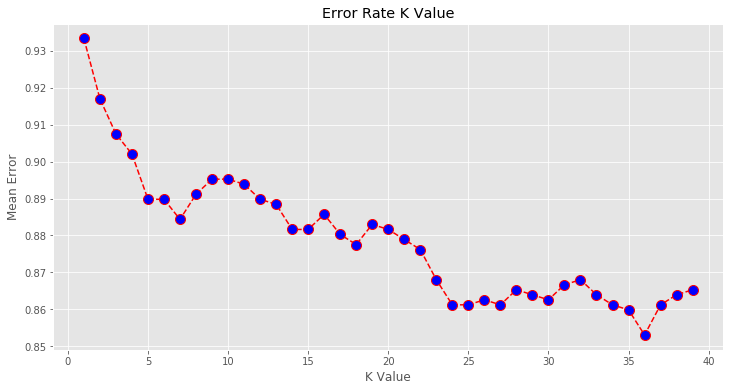

In [198]:
error1 = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error1.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


In [199]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
target = newcategorica['Attrition']
features = newcategorica.drop('Attrition', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=20)

#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)  
#test the accuracy
accuracy_score(y_test, test_pred)


0.8639455782312925

#  Precision and Recall 

In [200]:
## Divides the dataset into X, variables, and y, target
X = newcategorica.drop('Attrition', axis=1) # drop removes the column named 'Attrition' out of the dataset 'data'
y = newcategorica.loc[:,'Attrition'] # 'loc' is for 'location/localize'. Thus, we selected all the row of the column which is 
# localized by the name 'Attrition'
## Choses 70% of the data for training, (X_train,y_train), and reserves 30% for test (X_test, y_test) 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=30, random_state=42, stratify = y)

## Trains the learner, RandomForest, with the training dataset
model.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = model.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',model.score(X_train, y_train))

Classification repport:
              precision    recall  f1-score   support

          0       0.84      1.00      0.91      1208
          1       0.00      0.00      0.00       232

avg / total       0.70      0.84      0.77      1440

Accuracy score:
 0.8388888888888889


In [201]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
for i in range(len(cv_metric)):
    scores = cross_val_score(neigh, X, y, scoring=cv_metric[i],cv=5)
    print('\nMetric used: ', cv_metric[i])
    print('Cross validation scores:', scores)
    print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())


Metric used:  accuracy
Cross validation scores: [0.83728814 0.83728814 0.84013605 0.83959044 0.83959044]
Mean of the scores:  0.8387786425960446 
 with standard deviation 0.0012331935075144994

Metric used:  precision_macro
Cross validation scores: [0.41864407 0.41864407 0.42006803 0.41979522 0.41979522]
Mean of the scores:  0.4193893212980223 
 with standard deviation 0.0006165967537572497

Metric used:  recall_macro
Cross validation scores: [0.5 0.5 0.5 0.5 0.5]
Mean of the scores:  0.5 
 with standard deviation 0.0


In [202]:
#For Random Forest
# Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Random Forest Classifier: 0.839


# Calculate confusion matrice

In [206]:
# transforme the whole feature space into a matrix
from sklearn import preprocessing
Y=df2['Attrition']
X = df2.as_matrix().astype(np.float)

# standardize all features
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [207]:
# prediction function
def run_cv(X,y,clf_class, method, **kwargs):
    
    from sklearn.model_selection import cross_val_predict

      # Initialize a classifier with key word arguments
    clf = clf_class(**kwargs)

    predicted = cross_val_predict(clf, X, y, cv=3, method=method)

    return predicted

In [209]:
from sklearn.metrics import confusion_matrix
y = np.array(y)
class_names = np.unique(y)

# calculate confusion matrices
confusion_matrice = [( "Random Forest", confusion_matrix(y,run_cv(X,y,RandomForestClassifier, method='predict')) )]
    

# show confusion matrix values
print (confusion_matrice)

[('Random Forest', array([[1233,    0],
       [   0,  237]]))]


# Draw confusion matrice

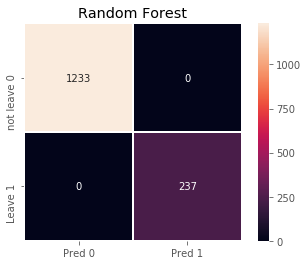

<Figure size 432x360 with 0 Axes>

In [211]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# draw confusion matrices
for cf in confusion_matrice:

    ax = plt.axes()
    ax.set_title(cf[0])
    df_cm = pd.DataFrame(cf[1], index = ["not leave 0", "Leave 1"], columns = ["Pred 0", "Pred 1"])
    plt.figure(figsize = (6,5))
    sn.heatmap(df_cm, annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
    

# Calculate prediction probabilities for all employees

In [213]:


# Use 10 estimators so predictions are all multiples of 0.1
pred_prob = run_cv(X, y, RandomForestClassifier, n_estimators=10,  method='predict_proba',)

pred_leave = pred_prob[:,1]
is_leave = y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_leave)

# calculate true probabilities
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_leave[pred_leave == prob])
    true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts



,pred_prob,count,true_prob
0,0.0,1183,0.0
1,1.0,206,1.0
2,0.1,50,0.0
3,0.9,21,1.0
4,0.8,5,1.0
5,0.7,5,1.0
